# Analysis of COVID-19 Spread on Worldwise
## *A small application on Principal Component Analysis*

### Learning Goals
We are using a practical case to help us have a better understanding on Principal Component Analysis(PCA). This small project is only focusing on the application of PCA, so the final conclusion will based on interpretation of PCA. 

### Introduction
The dataset we used here is from Kaggle. The dataset is consisted of `Confirmed`, `Deaths`, `Recovered`, `Active`, `New cases` and `New deaths` for most countries around the world. The programming language we used is Python. We will show the details of how to compute PCA with Python package `sklearn.decomposition.PCA`. Without doubt, understanding of mathematics behind PCA will help us having a deeper view on it, so you can check this [link](https://www.overleaf.com/project/62808daaf7dde29107ccfe2d) to reach out the mathematics part of PCA and Singular Value Decomposition(SVD).

### Import Packages
- numpy to handle array functions
- pandas to arrange matrix
- sklearn is used to do PCA
- matplotlib.pyplot for plotting data
- seaborn to create heat matrix

In [32]:
import numpy as np

import pandas as pd
pd.set_option('display.notebook_repr_html', False)

from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import homogeneity_score, v_measure_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

### Loading Data 

In [33]:
#this is general view of data
covid = pd.read_csv('country_wise_latest.csv')
covid.head()

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [34]:
# covid data only with numerical data
covid_data = covid.drop(['Country/Region', 'WHO Region'], axis=1)
covid_data.head()

   Confirmed  Deaths  Recovered  Active  New cases  New deaths  New recovered  \
0      36263    1269      25198    9796        106          10             18   
1       4880     144       2745    1991        117           6             63   
2      27973    1163      18837    7973        616           8            749   
3        907      52        803      52         10           0              0   
4        950      41        242     667         18           1              0   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                3.50                  69.49                    5.04   
1                2.95                  56.25                    5.25   
2                4.16                  67.34                    6.17   
3                5.73                  88.53                    6.48   
4                4.32                  25.47                   16.94   

   Confirmed last week  1 week change  1 week % increase  
0                3552

In [35]:

#covid_data.loc[covid_data["Deaths / 100 Recovered"] ]
inf_data =covid_data["Deaths / 100 Recovered"].iloc[covid_data["Deaths / 100 Recovered"].values == np.inf]

covid_data = covid_data.drop(covid_data.index[[32, 117, 147, 161, 163]])

covid_data["Deaths / 100 Recovered"]


0       5.04
1       5.25
2       6.17
3       6.48
4      16.94
       ...  
182     2.08
183    12.50
184    57.98
185     4.97
186     6.64
Name: Deaths / 100 Recovered, Length: 182, dtype: float64

In [36]:
covid = covid.drop(covid.index[[32, 117, 147, 161, 163]])
covid.shape
len(covid['Country/Region'])

182

In this chapter, we divided raw dataset `covid` into two sub datasets: `covid_data` and `covid`. `covid_data` contains the numerical data but `covid` contains string data.

### Heat map of `covid_data`

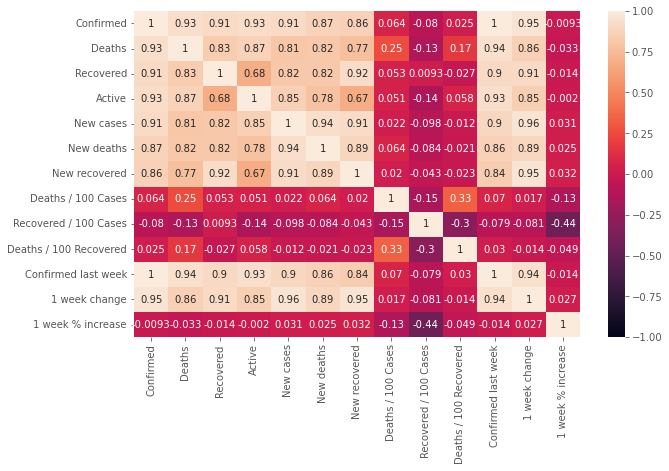

In [37]:
corr_data = covid_data.corr()
heatmap = sns.heatmap(corr_data, vmin=-1, vmax=1, annot=True)

This heat map is very general relateionship map for each variable.

### PCA

In [38]:
#We need to use scale() fucntion to do standardlization 
#Then using PCA model to get PCs
X = scale(covid_data.values)
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

In [39]:
#By using PCA we have 13 PCs 
pca_X = pd.DataFrame(X_PCA)
pca_X = pca_X.rename(columns = {0:'PC1',
                                1:'PC2',
                                2:'PC3',
                                3:'PC4',
                                4:'PC5',
                                5:'PC6',
                                6:'PC7', 
                                7:'PC8', 
                                8:'PC9', 
                                9:'PC10', 
                                10:'PC11',
                                11:'PC12',
                                12:'PC13'})


pca_X.head()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.482753 -0.171260 -0.422401  0.062822  0.212912  0.121505  0.036731   
1 -0.607735  0.263986  0.294543  0.072546  0.208532  0.177099  0.015285   
2 -0.400737  0.136533 -0.012049  0.360380 -0.066886 -0.065948 -0.076029   
3 -0.680466 -0.351731 -1.002879  0.563513 -0.147852 -0.309462 -0.241707   
4 -0.591797  1.347719  0.830681  0.381078  0.567714  0.635631  0.190708   

        PC8       PC9      PC10      PC11          PC12          PC13  
0 -0.002926  0.054757  0.011289 -0.009697 -3.099137e-15  8.000349e-16  
1 -0.025646  0.005230  0.022124 -0.010725  7.802291e-18 -4.548242e-17  
2 -0.131392 -0.021421  0.034291  0.035958  3.176605e-15  7.667524e-16  
3 -0.182049  0.045867  0.054797 -0.013045 -1.031796e-17 -1.101275e-17  
4 -0.073985  0.055917  0.019605  0.000116  3.112010e-17 -7.166932e-17  

In [48]:
pca_model.components_

array([[ 3.48045180e-01,  3.26608350e-01,  3.23794798e-01,
         3.15370025e-01,  3.36748112e-01,  3.27398786e-01,
         3.24992707e-01,  3.01276093e-02, -3.57616775e-02,
         1.16059554e-02,  3.45814522e-01,  3.46061722e-01,
         3.60985993e-03],
       [-1.26287349e-02,  1.22384249e-01, -8.58105828e-02,
         4.56879459e-02, -3.47680075e-02, -3.08497049e-02,
        -7.38939776e-02,  4.39671961e-01, -6.08209351e-01,
         5.66559094e-01, -7.69031630e-03, -4.71558012e-02,
         2.85112016e-01],
       [-1.42973470e-02, -1.31549040e-01, -1.73632266e-02,
        -1.52995355e-03,  5.94508410e-02,  3.56401000e-02,
         5.12076242e-02, -4.91893233e-01, -3.67146586e-01,
        -3.23367622e-01, -2.29175822e-02,  4.78373487e-02,
         7.00445544e-01],
       [-4.09201504e-02,  2.32087525e-02,  7.30783362e-02,
        -1.40198166e-01, -1.61472662e-02,  6.30567971e-02,
         5.55254129e-02,  7.23298710e-01,  4.09025338e-02,
        -6.15674695e-01, -4.44512500e

[6.16977460e-01 1.23266130e-01 1.04685584e-01 5.10483068e-02
 3.79863875e-02 3.19526101e-02 1.99390336e-02 8.87849218e-03
 3.61606840e-03 1.30097169e-03 3.48956503e-04 8.42921853e-33
 5.54548920e-34]


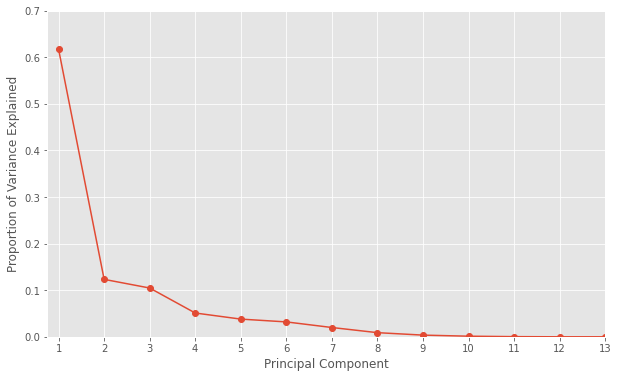

In [40]:
#Usually we can simply pick PC1 and PC2 as our result but here will show
#why we can only choose PC1
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')

plt.xlim(0.75,4.25)
plt.ylim(0,0.7)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.show()

From this plot we can tell that PC1 occupied 61% essential features in the data set, so we can only select PC1 as our result. 

In [41]:
#display the singlar values
singl_val = pca_model.singular_values_
print(singl_val)

[3.82069191e+01 1.70776949e+01 1.57380460e+01 1.09900088e+01
 9.48028443e+00 8.69481889e+00 6.86846078e+00 4.58328621e+00
 2.92499878e+00 1.75445120e+00 9.08642442e-01 4.46581807e-15
 1.14545307e-15]


To help understanding, we prefer to print out the singlar values of covariance matrix. From study note we know that eigenvalues of covariance matrix show variances of the respective PCs via 
$\lambda_i = \frac{\sigma_i^2}{n-1}$

In [42]:
len(covid['Country/Region'].values)
# for i,name in enumerate(covid['Country/Region'].values):
#     print(i)
len(X_PCA[:, 10])

182

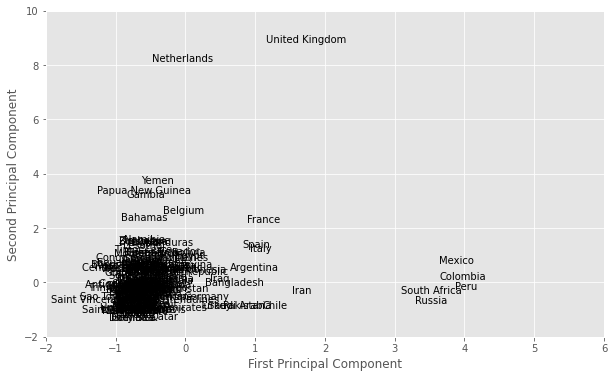

In [45]:
#We print out the first two PCs to find 
#which countries have the greatest impact on the pandemic
fig,ax1 = plt.subplots()

# ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
# ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)
ax1.set_xlim(-2,6)
ax1.set_ylim(-2,10)
          
# Plot Principal Components 1 and Principal Components 2
for i,name in enumerate(covid['Country/Region'].values):
    ax1.annotate(name, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)   

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

#### Interpretation
1. From last plot, we know that **Mexico**, **Colombia**, **Peru**, **South Africa** and **Russia** are have highest relation with COVID-19 . In other words, COVID-19 is out of control in these countries. 
2. **United Kingdom** and **Netherlands** have the variance in PC2 that means even through they are no first class countries but they are potential countries might be lost control. Therefore, they still have chance to handle COVID-19 spread in their nations.

### About this Notebook

**Author**: Zhenzhao Tu. \
**Updated On**: 2022-07-17